# CSCI 3022: Intro to Data Science - Fall 2017 Practicum 
***


This practicum is due on Moodle by **11:59pm on Wednesday December 13th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
2. You may **NOT** post to message boards or other online resources asking for help. 
3. You may **NOT** collaborate with classmates or anyone else.  

Violation of the above rules will result in an **F** in the course and a trip to Honor Council. 

***

**By writing your name below you agree to abide by the rules given above:**

**Name**: Javier Ramirez

**Section**: 001
***


**NOTES**: 

- You may not use late days on the practicum nor can you drop your practicum grade. 
- If you have a question for Chris and Dan, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class we will make the post public (and anonymous). 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [30]:
import math
import statsmodels.api as sm
from scipy import stats 
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### [40 points] Problem 1: Parking Problems 
***

Imagine that there are 50 parking spots on a street. A store is located at position 0, and each parking space along the street is numbered according to its distance from the store, so that the space right in front of the store is spot 0, the next is spot 1, and so on up until the end of the block, which is spot 49.

**Prof. Ketelsen is direct and systematic**. He enters the street and drives all the way to the store, which takes him 90 seconds. Then, he drives incrementally away from the store, taking 2 seconds for each parking spot that he checks. He parks in the first empty spot (after he checks it) and then walks to the store from there, covering ground at a rate of 5 seconds per parking spot. If Chris parks in spot 0, he doesn’t need to walk at all, but he’d still have to check to see if the spot was taken. If he makes it to the end of the road with not a single parking spot to be found, he parks in his secret spot, which is always free, but far away, which takes him an additional 5 minutes beyond the time he already spent using his parking strategy.

**Prof. Larremore is strategic and prone to overthinking**. He enters the street at the end, position 49, and starts driving toward the store, but checks each spot that he passes, taking 2 second to check each. But, in an attempt to be clever, he doesn’t park in the first spot he sees, because what if there’s a closer spot? Instead, he passes n empty spots and then parks in the next empty spot he sees (after he checks it). From where he parks on the street, he walks to the store at a speed of 5 seconds per parking spot. Just like Chris, if Dan parks in spot 0, he doesn’t need to walk at all, but he’d still have to check to see if the spot was taken. If he gets all the way to the store without parking, he parks in his own secret spot, which is always free, but not really close, which takes him an additional 3 minutes beyond the time he already spent using his parking strategy.

**Part A**: Write a function **chris_park_time**$(\hspace{.5mm}p)$ that performs a single trial and returns the total time, in seconds, for Chris to get to the store, given the probability that each spot is occupied by a car already, $p$. In addition to showing your code, you should also describe and implement a simple test to convince yourself (and us) that your code is working correctly. 

In [31]:
def chris_park_time(p):
    total_time = 90
    for i in range(50):
        taken = np.random.choice([False,True], p=[1-p,p])
        total_time = total_time + 2
        if taken == False:
            return total_time + (5*i)
    return total_time + (5*60)
total_time = chris_park_time(1)
print("Chris takes this much time: {} seconds".format(total_time))

Chris takes this much time: 490 seconds


**Part B**: Write a function **dan_park_time**$(\hspace{.5mm}p, n)$ that performs a single trial and returns the total time, in seconds, for dan to get to the store, where $n$ is the number of empty spots he passes before taking the next available spot. In addition to showing your code, you should also describe and implement a simple test to convince yourself (and us) that your code is working correctly. 

In [53]:
def dan_park_time(p,n):
    start_time = 0
    for i in range(50):
        taken = np.random.choice([False,True], p = [1-p,p])
        start_time = start_time + 2
        if taken == False:
            n=n-1
            if n <= False:
                return start_time + (49-i)*5
    return start_time + 180
start_time = dan_park_time(.6, 1)
print("Dan takes this much time: {}".format(start_time))

Dan takes this much time: 229


**Part C**: Run simulations to evaluate their parking strategies on a sleepy Tuesday morning when the probability of a parking space being occupied is $p=0.6$.  Perform $1000$ trials each for Chris's strategy and Dan's strategy with parameters $n=1,2,$ and $3$. Plot 4 histograms, one on top of the other, for the resulting parking times with bin boundaries at $[0, 10, 20, \ldots, 300]$.  Be sure to label all axes and provide meaningful titles for each histogram.  Based on your histograms, which of the four strategies appears to be the best? 

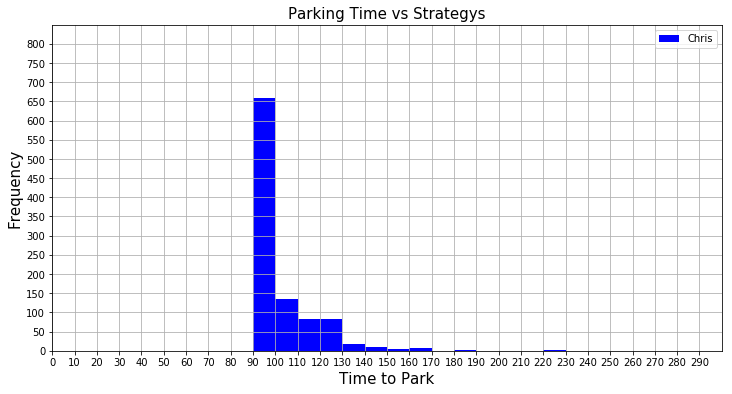

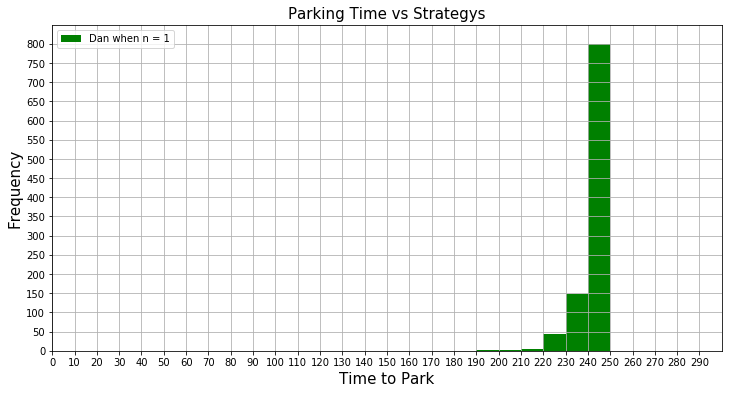

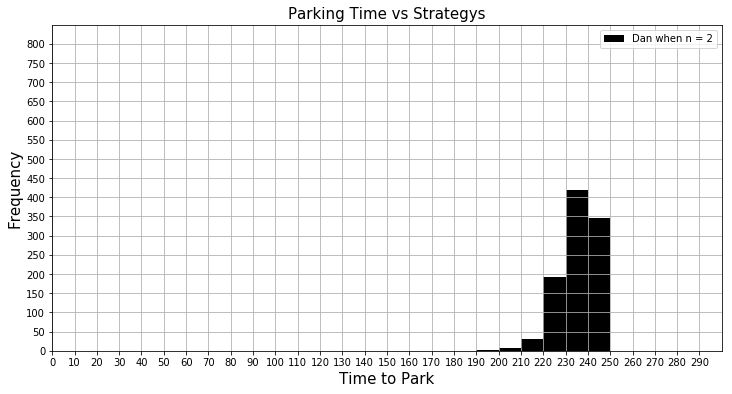

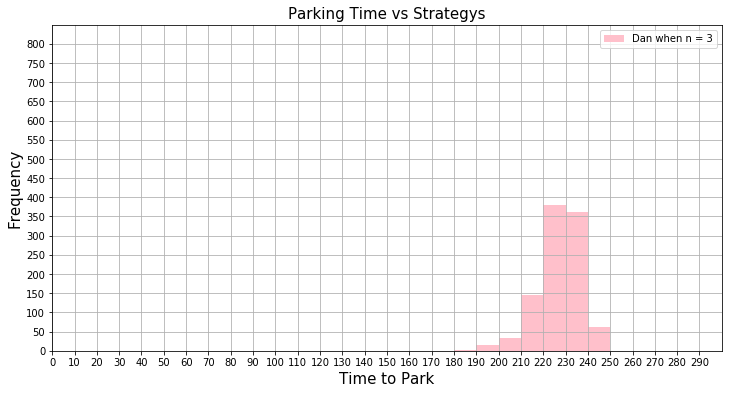

In [33]:
chris, dan1, dan2, dan3 = ([] for i in range(4))
p, trials = 0.6, 1000
for i in range(trials):
    chris.append(chris_park_time(p))
    dan1.append(dan_park_time(p,1))
    dan2.append(dan_park_time(p,2))
    dan3.append(dan_park_time(p,3))
for i in range(1):
    chrisio = pd.Series(chris)
    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_title("Parking Time vs Strategys", fontsize=15)
    ax.set_xlabel("Time to Park", fontsize=15)
    ax.set_ylabel("Frequency", fontsize=15)
    ax.set_xlim([0,300])
    ax.set_ylim([0,850])
    plt.xticks(np.arange(0, 300,10))
    plt.yticks(np.arange(0, 850,50))
    chrisio.hist(color="blue", label="Chris", bins=np.arange(0,300,10))
    plt.legend()
    plt.show()
for i in range(1):
    danio1 = pd.Series(dan1)
    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_title("Parking Time vs Strategys", fontsize=15)
    ax.set_xlabel("Time to Park", fontsize=15)
    ax.set_ylabel("Frequency", fontsize=15)
    ax.set_xlim([0,300])
    ax.set_ylim([0,850])
    plt.xticks(np.arange(0, 300,10))
    plt.yticks(np.arange(0, 850,50))
    danio1.hist(color="green", label="Dan when n = 1", bins=np.arange(0,300,10))
    plt.legend()
    plt.show()
for i in range(1):
    danio2 = pd.Series(dan2)
    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_title("Parking Time vs Strategys", fontsize=15)
    ax.set_xlabel("Time to Park", fontsize=15)
    ax.set_ylabel("Frequency", fontsize=15)
    ax.set_xlim([0,300])
    ax.set_ylim([0,850])
    plt.xticks(np.arange(0, 300,10))
    plt.yticks(np.arange(0, 850,50))
    danio2.hist(color="black", label="Dan when n = 2", bins=np.arange(0,300,10))
    plt.legend()
    plt.show()
for i in range(1):
    danio3 = pd.Series(dan3)
    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_title("Parking Time vs Strategys", fontsize=15)
    ax.set_xlabel("Time to Park", fontsize=15)
    ax.set_ylabel("Frequency", fontsize=15)
    ax.set_xlim([0,300])
    ax.set_ylim([0,850])
    plt.xticks(np.arange(0, 300,10))
    plt.yticks(np.arange(0, 850,50))
    danio3.hist(color="pink", label="Dan when n = 3", bins=np.arange(0,300,10))
    plt.legend()
    plt.show()

**Part D**: Run simulations with at least $1000$ trials and plot estimates of the expected parking time on a single graph for Chris's strategy and Dan's strategy with parameters $p=0.6$ and $n=0, 1, \ldots, 25$. Report the optimal parameter $n$ for Dan's strategy and use your plot to decide whose strategy is better. 

Dan optimal parameter with n:  16  time:  147.637 seconds


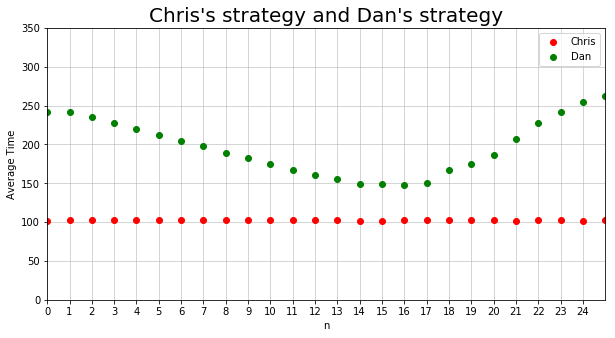

In [34]:
chris_expected, dan_expected, time = ([] for i in range(3))
for i in range(26):
    hold, hold2 = ([] for i in range(2))
    for j in range(1000):
        hold2.append(chris_park_time(0.6))
    for j in range(1000):
        hold.append(dan_park_time(0.6, i))
    Avg = np.average(hold)
    dan_expected.append(Avg)
    Avg2 = np.average(hold2)
    chris_expected.append(Avg2)
danN = dan_expected.index(min(dan_expected))
danBT = min(dan_expected)
chriss = pd.Series(chris_expected)
dann = pd.Series(dan_expected)
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title("Chris's strategy and Dan's strategy", fontsize=20)
ax.set_xlabel("n")
ax.set_ylabel("Average Time")
ax.set_xlim([0,25])
ax.set_ylim([0,350])
print("Dan optimal parameter with n: ",danN," time: ",danBT, "seconds")
time = np.arange(26)
plt.xticks(np.arange(0,25,1))
plt.grid(True, alpha=0.65)
plt.plot(time, chriss,'ro', label="Chris")
plt.plot(time, dann,'go', label="Dan")
plt.legend()

**Part E**: Repeat **Part C** for a busier shopping time when the probability of any space being occupied is $p = 0.95$.

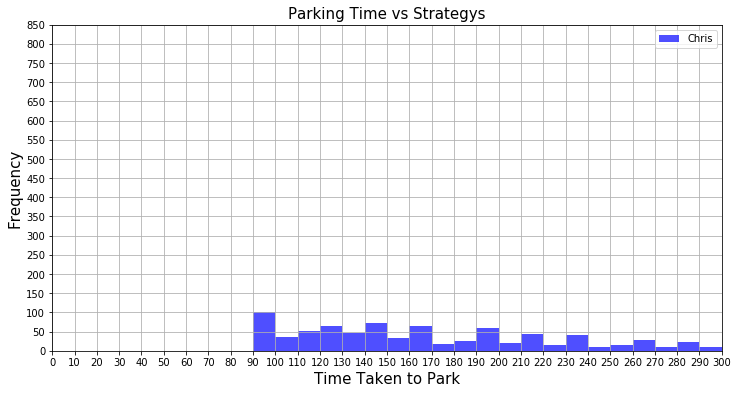

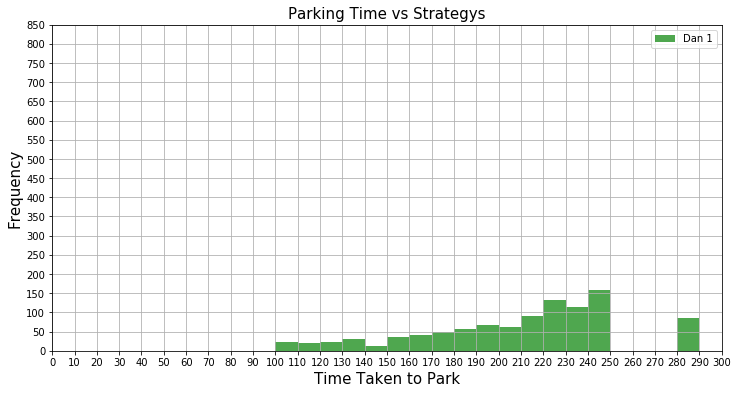

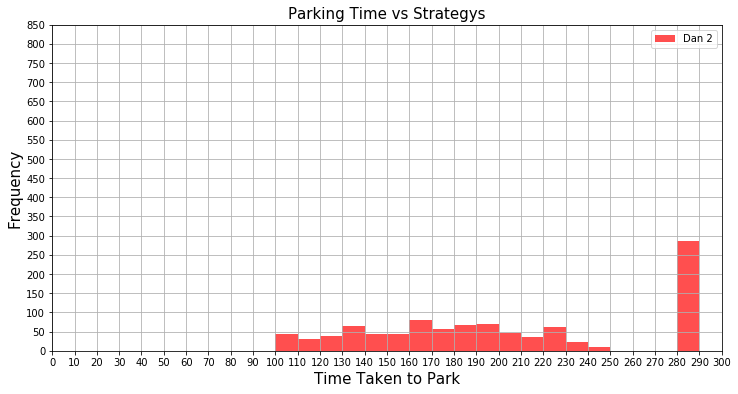

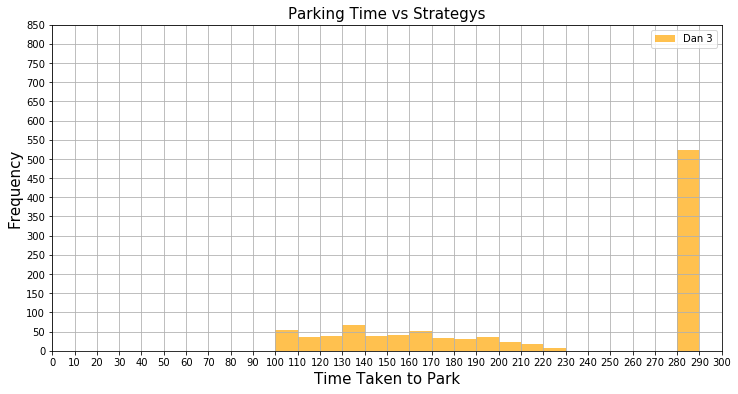

In [35]:
chris, dan1, dan2, dan3 = ([] for i in range(4))
p, trials = 0.95, 1000
my_bins = range(0,300+10,10)
for i in range(trials):
    chris.append(chris_park_time(p))
    dan1.append(dan_park_time(p,1))
    dan2.append(dan_park_time(p,2))
    dan3.append(dan_park_time(p,3))
for i in range(1):
    chrisio = pd.Series(chris)
    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_title("Parking Time vs Strategys", fontsize=15)
    ax.set_xlabel("Time Taken to Park", fontsize=15)
    ax.set_ylabel("Frequency", fontsize=15)
    ax.set_xlim([0,300])
    ax.set_ylim([0,850])
    plt.xticks(np.arange(0, 300+10,10))
    plt.yticks(np.arange(0, 850+50,50))
    chrisio.hist(alpha=0.69, color="blue", label="Chris", bins = my_bins)
    plt.legend()
    plt.show()
for i in range(1):
    danio1 = pd.Series(dan1)
    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_title("Parking Time vs Strategys", fontsize=15)
    ax.set_xlabel("Time Taken to Park", fontsize=15)
    ax.set_ylabel("Frequency", fontsize=15)
    ax.set_xlim([0,300])
    ax.set_ylim([0,850])
    plt.xticks(np.arange(0, 300+10,10))
    plt.yticks(np.arange(0, 850+50,50))
    danio1.hist(alpha=0.69, color="green", label="Dan 1", bins = my_bins)
    plt.legend()
    plt.show()
for i in range(1):
    danio2 = pd.Series(dan2)
    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_title("Parking Time vs Strategys", fontsize=15)
    ax.set_xlabel("Time Taken to Park", fontsize=15)
    ax.set_ylabel("Frequency", fontsize=15)
    ax.set_xlim([0,300])
    ax.set_ylim([0,850])
    plt.xticks(np.arange(0, 300+10,10))
    plt.yticks(np.arange(0, 850+50,50))
    danio2.hist(alpha=0.69, color="red", label="Dan 2", bins = my_bins)
    plt.legend()
    plt.show()
for i in range(1):
    danio3 = pd.Series(dan3)
    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_title("Parking Time vs Strategys", fontsize=15)
    ax.set_xlabel("Time Taken to Park", fontsize=15)
    ax.set_ylabel("Frequency", fontsize=15)
    ax.set_xlim([0,300])
    ax.set_ylim([0,850])
    plt.xticks(np.arange(0, 300+10,10))
    plt.yticks(np.arange(0, 850+50,50))
    danio3.hist(alpha=0.69, color="orange", label="Dan 3", bins = my_bins)
    plt.legend()
    plt.show()

**Part F**: Repeat **Part D** for a busier shopping time when the probability of any space being occupied is $p = 0.95$.

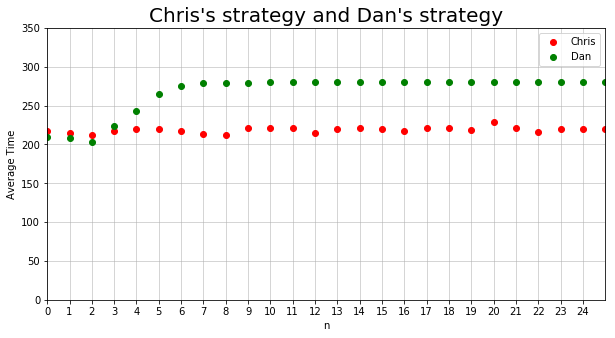

In [36]:
chris_expected, dan_expected, time = ([] for i in range(3))
for i in range(26):
    hold, hold2 = ([] for i in range(2))
    for j in range(1000):
        hold2.append(chris_park_time(0.95))
    for j in range(1000):
        hold.append(dan_park_time(0.95, i))
    Avg = np.average(hold)
    dan_expected.append(Avg)
    Avg2 = np.average(hold2)
    chris_expected.append(Avg2)
danN = dan_expected.index(min(dan_expected))
danBT = min(dan_expected)
chriss = pd.Series(chris_expected)
dann = pd.Series(dan_expected)
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title("Chris's strategy and Dan's strategy", fontsize=20)
ax.set_xlabel("n")
ax.set_ylabel("Average Time")
ax.set_xlim([0,25])
ax.set_ylim([0,350])
time = np.arange(26)
plt.xticks(np.arange(0,25,1))
plt.grid(True, alpha=0.65)
plt.plot(time, chriss,'ro', label="Chris")
plt.plot(time, dann,'go', label="Dan")
plt.legend()

**Part G**: Analytically determine a formula for Chris's expected parking time as a function of the parameter $p$.  Verify that your exact result agrees well with your simulated results from **Parts D** and **F**.

Expected value of a geometric distribution $\frac{1-p}{p}$
Which would be $5\frac{1-0.05}{0.05}+2\frac{1-0.05}{0.05}+90 = 223$, with $p = 0.95$ the probability of success, $p = 1 - 0.95 \rightarrow 0.05$ is the probability of failure minus the probability of success which is $0.5$. $5\frac{1-0.05}{0.05}+2\frac{1-0.05}{2}+90 = 223$

**Part H**: Analytically determine a formula for Dan's expected parking time as a function of parameters $p$ and $n$.  Verify that your exact result agrees well with your simulated results from **Parts D** and **F**.

Dan's expected formula negative binomial distribution which is $\frac{pn}{1-p}(49-i)$ when $n = 3$ for the number of trials and $p = 0.6$ as the probability of success. This plugged in to the formula would be $(\frac{0.6*3}{1-0.6}*5+2*\frac{0.6*3}{1-0.6}*5)*(49-60)
\rightarrow $

**Part I**: Use the formulas you found in **Parts G** and **H** to make an argument about whose strategy is better — and, if the answer is it depends, explain which values of $p$ and/or $n$ allow Chris to get to the store faster than Dan. Provide any graphical summaries necessary to justify your conclusion. 

**Note**: While we hope that you come up with correct analytic formulas in **Parts G** and **H**, you may feel free to use the code written above to do this analysis using simulation estimates. 

I believe Chris would have the better strategy of the two. With p-values of p=0.6 and p=0.95, Chris had a better average time than Dan.

### [30 points] Problem 2: Gender Balance in Movements Between Academic Disciplines
***

Every year, the online academic resume service, ORCID, dumps the data from all of the professors who have their privacy settings set to “public” so that the research community can learn about the makeup of the academic workforce. In this real-data problem, we’re going to study the flows of professors between different academic fields to learn about gender differences. We’ll use a pre-processed dataset used by actual researchers studying gender imbalance across fields.

First, some information about the data. For each of the 1.6 million professors in the public ORCID data dump, the researchers determined (a) what field they are currently in, (b) what field they did their PhD in, and (c) their gender. Here, because the goal of the study was originally to learn about disparities between men and women, gender was coded by the researchers as male or female, as indicated by the professors. Those who chose not to mark their gender as public were not included in the processed dataset.

The researchers have provided CSCI 3022 with two files: **totals.csv** and **switch_edgelist.csv**. The first file enumerates the total numbers of men and women in each of $30$ different fields. The second file enumerates the total numbers of men and women who switched from one field to another field during their career.

The null hypothesis about the data is that the gender balance of people leaving field $X$ is the same as the gender balance in field $X$. For example, if Anthropology is $50\%$ women and $50\%$ men, we expect people who have moved from Anthropology to another field to reflect this $50/50$ balance. On the other hand, if Physics is only $15\%$ women and $85\%$ men, we expect people who have moved from Physics to another field to reflect a $15/85$ balance.

In symbolic form, we might write this as follows. Let the proportion of professors in field i who are women be given by $p_i$, and let the proportion of women who move from field i to some other field be given by $q_i$. Then the expected result is that $p_i$ = $q_i$. The researchers are interested to know if there is statistical evidence that $p_i \neq q_i$ for any of the fields $i$.

**Part A**: Wrangle those data files. Then, make a plot of $p_i$ for all $i = 1, 2, \ldots, 30$ fields using a green color, and on the same axes, plot $q_i$ using a blue color.

In [62]:
dfT = pd.read_csv('https://raw.githubusercontent.com/chrisketelsen/csci3022/master/practicum/data/totals.csv')
dfT = dfT.drop(['idx'], axis=1)
dfTotal = dfT.groupby(['field', 'gend_cat']).sum()
dfTotalP = dfT.drop(['gend_cat'], axis=1)

female = []
male = []
for person, row in dfTotal.iterrows():
    if person[1] == 'female':
        female.append(person)
    elif person[1] == 'male':
        male.append(person)
    print(person)
    print(row)
    print("--------------------")
total = []
allPeople = []
for i in range(len(allPeople)):
    allPeople.append(female[i] / total[i])
    
dfTS = pd.read_csv('https://raw.githubusercontent.com/chrisketelsen/csci3022/master/practicum/data/switch_edgelist.csv')
dfTS = dfT.drop(['from'],["to"], axis=1)
dfTotalS = dfT.groupby(['field', 'gend_cat']).sum()
dfTotalP = dfT.drop(['gend_cat'], axis=1)
    
female_Switch = []
male_Switch = []
for person_switch, row in dfTotal.iterrows():
    if person_switch[1] == 'female':
        female_Switch.append(person_switch)
    elif person_switch[1] == 'male':
        male_Switch.append(person_switch)
total_switch = []
allPeople_switch = []
for i in range(len(allPeople_switch)):
    allPeople_switch.append(female[i] / total_switch[i])
    
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title("Parking Time vs Strategys", fontsize=15)
ax.set_xlabel("Time Taken to Park", fontsize=15)
ax.set_ylabel("Frequency", fontsize=15)
ax.set_xlim([0,300])
ax.set_ylim([0,850])
plt.xticks(np.arange(0, 300+10,10))
plt.yticks(np.arange(0, 850+50,50))
plt.plot(pd.Series(allPeople),"g.")
plt.plot(pd.Series(allPeople_switch), 'b.')
plt.legend()
plt.show()

('anthropology', 'female')
N    1269
Name: (anthropology, female), dtype: int64
--------------------
('anthropology', 'male')
N    1464
Name: (anthropology, male), dtype: int64
--------------------
('archaeology', 'female')
N    619
Name: (archaeology, female), dtype: int64
--------------------
('archaeology', 'male')
N    743
Name: (archaeology, male), dtype: int64
--------------------
('art history', 'female')
N    315
Name: (art history, female), dtype: int64
--------------------
('art history', 'male')
N    250
Name: (art history, male), dtype: int64
--------------------
('astronomy', 'female')
N    784
Name: (astronomy, female), dtype: int64
--------------------
('astronomy', 'male')
N    3135
Name: (astronomy, male), dtype: int64
--------------------
('biochemistry', 'female')
N    2179
Name: (biochemistry, female), dtype: int64
--------------------
('biochemistry', 'male')
N    4669
Name: (biochemistry, male), dtype: int64
--------------------
('chemistry', 'female')
N    6085
N

TypeError: drop() got multiple values for argument 'axis'

**Part B**: At the $\alpha = 0.05$ significance level, use the method of your choice to determine whether there is sufficient evidence that $p_i \neq q_i$. Be sure to explain why you are justified in using the method that you used, and report the numbers that helped you make your decision for each of the fields. Please use only methods we have discussed in class. Then, replicate your plot from **Part A** and add a red symbol to those fields, if any, where $p_i$ and $q_i$ are statistically different at the given significance level. Comment on any significant findings.  

In [54]:
dfT = pd.read_csv('https://raw.githubusercontent.com/chrisketelsen/csci3022/master/practicum/data/totals.csv')
dfT = dfT.drop(['idx'], axis=1)
dfTotal = dfT.groupby(['field', 'gend_cat']).sum()
dfTotalP = dfT.drop(['gend_cat'], axis=1)

female = []
male = []
for person, row in dfTotal.iterrows():
    if person[1] == 'female':
        female.append(person)
    elif person[1] == 'male':
        male.append(person)
    print(person)
    print(row)
    print("--------------------")
    
dfTS = pd.read_csv('https://raw.githubusercontent.com/chrisketelsen/csci3022/master/practicum/data/switch_edgelist.csv')
dfTS = dfT.drop(['from'],["to"], axis=1)
dfTotalS = dfT.groupby(['field', 'gend_cat']).sum()
dfTotalPS = dfT.drop(['gend_cat'], axis=1)

('anthropology', 'female')
N    1269
Name: (anthropology, female), dtype: int64
--------------------
('anthropology', 'male')
N    1464
Name: (anthropology, male), dtype: int64
--------------------
('archaeology', 'female')
N    619
Name: (archaeology, female), dtype: int64
--------------------
('archaeology', 'male')
N    743
Name: (archaeology, male), dtype: int64
--------------------
('art history', 'female')
N    315
Name: (art history, female), dtype: int64
--------------------
('art history', 'male')
N    250
Name: (art history, male), dtype: int64
--------------------
('astronomy', 'female')
N    784
Name: (astronomy, female), dtype: int64
--------------------
('astronomy', 'male')
N    3135
Name: (astronomy, male), dtype: int64
--------------------
('biochemistry', 'female')
N    2179
Name: (biochemistry, female), dtype: int64
--------------------
('biochemistry', 'male')
N    4669
Name: (biochemistry, male), dtype: int64
--------------------
('chemistry', 'female')
N    6085
N

**Part C**: Repeat the procedure from **Part B** at the $\alpha = 0.01$ level. 

In [ ]:
dfT = pd.read_csv('https://raw.githubusercontent.com/chrisketelsen/csci3022/master/practicum/data/totals.csv')
dfT = dfT.drop(['idx'], axis=1)
dfTotal = dfT.groupby(['field', 'gend_cat']).sum()
dfTotalP = dfT.drop(['gend_cat'], axis=1)

female = []
male = []
for person, row in dfTotal.iterrows():
    if person[1] == 'female':
        female.append(person)
    elif person[1] == 'male':
        male.append(person)
    print(person)
    print(row)
    print("--------------------")
    
dfTS = pd.read_csv('https://raw.githubusercontent.com/chrisketelsen/csci3022/master/practicum/data/switch_edgelist.csv')
dfTS = dfT.drop(['from'],["to"], axis=1)
dfTotalS = dfT.groupby(['field', 'gend_cat']).sum()
dfTotalPS = dfT.drop(['gend_cat'], axis=1)

### [30 points] Problem 3: Multiple Linear Ralphie-gression 
***

After years of study and professional development, you have finally landed your dream job as Ralphie's data-driven lead handler.  As your first project, you wish to use multiple linear regression to understand and predict what makes Ralphie happy, as measured during halftime of home football games.  Luckily, your predecessor has collected lots of data that might prove relevant.  You'll find this data in the file ralphie.csv. 

**Response**: 

- $\texttt{happiness}$: Ralphie's happiness, measured by a complicated formula involving rate of tail flicks, happy-sounding snorts, and numerous other factors 

**Features**: 

- $\texttt{hay freshness}$: freshness of Ralphie's hay, measured in Freshies 
- $\texttt{coat silkiness}$: silkiness of Ralphie's coat, measured in Larremores 
- $\texttt{run length}$: the length of Ralphie's halftime run, measured in yards 
- $\texttt{temp}$: the outside temperature, measured in degrees Fahrenheit 
- $\texttt{SCMLP}$: the snow-capped majesty of Longs Peak, measured as a fraction between 0 and 1  
- $\texttt{mean GPA}$: mean GPA of Ralphie's handlers 
- $\texttt{score diff}$: the score differential (CU's score minus Opponent' score) at halftime 
- $\texttt{star yards}$: the number of rushing yards by CU's star running back at halftime 
- $\texttt{ice cream sold}$: the number of units of ice cream sold at the concession stand 
- $\texttt{shark attacks}$: the number of shark attacks at the Boulder Res on game day 


**Part A**: Read the data from **ralphie.csv** into a Pandas DataFrame and clean the data.  Note that since we will be doing a multiple linear regression we will need all of the features, so you should drop any row in the DataFrame that is missing data.  

In [50]:
dfRalphie = pd.read_csv('https://raw.githubusercontent.com/chrisketelsen/csci3022/master/practicum/data/ralphie.csv')
dfRalph = dfRalphie.dropna(axis=0).copy()
dfRalph["hay freshness"] = dfRalph["hay freshness"].apply(lambda x: (x.replace('ƭ','')))
dfRalph["hay freshness"] = dfRalph["hay freshness"].apply(lambda x: (float(x)))
dfRalph["coat silkiness"] = dfRalph["coat silkiness"].apply(lambda x: (x.replace('ɭ','')))
dfRalph["coat silkiness"] = dfRalph["coat silkiness"].apply(lambda x: (float(x)))
dfRalph["temp"] = dfRalph["temp"].apply(lambda x: (x.replace('℉','')))
dfRalph["temp"] = dfRalph["temp"].apply(lambda x: (float(x)))
dfRalph.info()
dfRalph.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 96
Data columns (total 11 columns):
happiness         85 non-null float64
hay freshness     85 non-null float64
coat silkiness    85 non-null float64
run length        85 non-null float64
temp              85 non-null float64
SCMLP             85 non-null float64
handler GPA       85 non-null float64
score diff        85 non-null float64
star yards        85 non-null float64
ice cream sold    85 non-null float64
shark attacks     85 non-null float64
dtypes: float64(11)
memory usage: 8.0 KB


,happiness,hay freshness,coat silkiness,run length,temp,SCMLP,handler GPA,score diff,star yards,ice cream sold,shark attacks
0,138.70,89.1,6.8,263.0,62.0,1.00,2.04,0.0,25.0,196.0,3.0
1,121.87,93.4,8.0,264.0,63.0,1.00,2.69,-4.0,21.0,189.0,1.0
2,117.31,85.9,7.6,243.0,55.0,0.84,3.17,-2.0,11.0,219.0,0.0
3,80.69,89.1,6.0,260.0,52.0,0.73,2.13,-13.0,107.0,101.0,0.0
4,127.52,94.6,8.1,251.0,57.0,0.89,2.40,-6.0,43.0,186.0,0.0


**Part B**: Perform the appropriate statistical test at the $\alpha = 0.05$ significance level to determine if _at least one_ of the features is related to the the response $y$.  Clearly describe your methodology and show all computations in Python. 

In [51]:
y, X = dfRalph["happiness"], dfRalph.iloc[:,1:]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     572.2
Date:                Thu, 14 Dec 2017   Prob (F-statistic):           8.10e-66
Time:                        06:22:16   Log-Likelihood:                -249.37
No. Observations:                  85   AIC:                             520.7
Df Residuals:                      74   BIC:                             547.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            -35.2765     13.517     -2.610      0.011       -62.210    -8.343
hay freshness      0.9940      0.113      8.832      0.000         0.770     1.218
coat silkiness     4.0447      0.689      5.868      0.000         2.671     5.418
run length         0.4486      0.037     12.183      0.000         0.375     0.522
temp              -0.9955      0.082    -12.181      0.000        -1.158    -0.833
SCMLP             -2.7631      3.823     -0.723      0.472       -10.380     4.854
handler GPA        0.8343      0.969      0.861      0.392        -1.096     2.765
score diff         5.0875      0.083     61.298      0.000         4.922     5.253
star yards        -0.0108      0.014     -0.749      0.457        -0.040     0.018
ice cream sold     0.0127      0.011      1.121      0.266        -0.010     0.035
shark attacks      0.4050      0.694      0.584      0.561        -0.978     1.788
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.985
Skew:                           0.170   Prob(JB):                        0.611
Kurtosis:                       2.597   Cond. No.                     8.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Since the probability of the F-statistic is a lot lower than 0.5 we have good reason to reject the null hypothesis in favor of the alternative hypothesis.

**Part C**: Write a function **forward_select**(df, resp_str, maxk) that takes in the DataFrame, the name of the column corresponding to the response, and the max number of desired features, and returns a list of feature names corresponding to the maxk most important features via forward selection.  At each stage in forward selection you should add the feature whose inclusion in the model would result in the lowest sum of squared errors $(SSE)$. Use your function to determine the best $k=5$ features to include in the model. Clearly indicate which feature was added in each stage. 

**Note**: The point of this exercise is to see if you can implement **foward_select** yourself.  You may of course use canned routines like statmodels OLS, but you may not call any Python method that explicitly performs forward selection. 

In [45]:
def forward_select(df, resp_str, maxk):
    y = df[resp_str]
    x = df.drop(resp_str, axis=1)
    Func = np.zeros(len(ResponseY))
    for i in range(len(Func)):
        current, bestF = 1, []
        model = sm.OLS(y, x).fit() 
        Func[i] = model.params[0]
    while current > maxk:
        return False
        continue
    while current <= maxk:
        bParam = []
        col = x.columns.get_values()
        for i in range(len(col)):
            if col[i] != "const":
                if col[i] not in bestF:
                    bParam = col[i]
            elif col[i] == "const":
                continue
        bestF.append(bParam)
        current = current + 1
        print("{} are most important features".format(bParam))           
    return bestF
forward_select(dfRalph, "happiness", 5)

shark attacks are most important features
ice cream sold are most important features
star yards are most important features
score diff are most important features
handler GPA are most important features


['shark attacks', 'ice cream sold', 'star yards', 'score diff', 'handler GPA']

**Part D**: Write down the multiple linear regression model, including estimated parameters, obtained by your forward selection process. 

- The multiple linear regression model: 
- $$\hat y = -35.2765 + 0.4050x_1 + 0.0127x_2 - 0.0108x_3 + 5.0875x_4 +0.8343x_5$$
- $x_1$ is shark attacks, $x_2$ is ice cream sold, $x_3$ is star yards, $x_4$ score diff, and $x_5$ handler GPA.  

**Part E**: Perform the appropriate statistical test at the $\alpha = 0.05$ significance level to determine whether there is a statistically significant difference between the full model with all features and the reduced model obtained by forward selection in **Part D**. 

In [46]:
ResponseY = dfRalph["happiness"].values
hay = dfRalph["hay freshness"].values
coat = dfRalph["coat silkiness"].values
run = dfRalph["run length"].values
temp = dfRalph["temp"].values
SCMLP = dfRalph["SCMLP"].values
mean = dfRalph["handler GPA"].values
score = dfRalph["score diff"].values
star = dfRalph["star yards"].values
ice = dfRalph["ice cream sold"].values
shark = dfRalph["shark attacks"].values

full = -35.2765079524 + 0.993970430155*hay + 4.04469641937*coat + 0.448604128706*run + -0.995528009085*temp + -2.7631312727*SCMLP + 0.834257527007*mean + 5.08746602272*score + -0.0108379744878*star + 0.0127111749235*ice + 0.404983791222*shark
Partial = -35.2765079524 + 0.4050*shark + 0.0127*ice - 0.0108*star + 5.0875*mean - 0.8343*temp 
SSE_part = np.sum((ResponseY-Partial)**2)
SSE_full = np.sum((ResponseY-full)**2)
Res_y = (len(ResponseY)-11)
F_test = ((SSE_part - SSE_full)/(5))/(SSE_full/(Res_y))
p_value = 1 - stats.f.cdf(F_test, 5, Res_y) 
print("p-value =", p_value)
print("SSE full model =", SSE_full)
print("SSE reduced model =", SSE_part)
print("Using the F-test we get F =", F_test)

p-value = 1.11022302463e-16
SSE full model = 1758.54678655
SSE reduced model = 3707125.75322
Using the F-test we get F = 31184.5184186


P-value of $1.11022302463 \cdot 10^{-16} < 0.05$, so we can reject the null hypothesis. Since the SSE of the reduced model ($3707125.75322$), is larger than the SSE of the full model ($1758.54678655$), full model is better than the reduced model.

**Part F**: Based on your conclusions in **Part E**, use the _better_ of the two models to predict Ralphie's happiness when the following features are observed: 

- $\texttt{hay freshness}$: 92 Freshies 
- $\texttt{coat silkiness}$: 8.5 Laramores 
- $\texttt{run length}$: 275 yards 
- $\texttt{temp}$: 45F 
- $\texttt{SCMLP}$: 0.80 
- $\texttt{mean GPA}$: 3.50 
- $\texttt{score diff}$: -10 
- $\texttt{star yards}$: 55 
- $\texttt{ice cream sold}$: 125
- $\texttt{shark attacks}$: 2 

In [47]:
hay, coat, run, temp, SCLMP, mean, score, star, ice, shark = 92,8.5,275,45,0.80,3.5,-10,55,125,2
total = -35.2765 + 0.9940*hay + 4.0447*coat + 0.4486*run + -0.9955*temp + -2.7631*SCLMP + 0.8343*mean + 5.0875*score + -0.0108*star + 0.0127*ice + 0.4050*shark
print ("The estimate of Ralphie's 'happiness' doing the full model with the above features is: {}".format(total))

The estimate of Ralphie's 'happiness' doing the full model with the above features is: 120.75702000000001
